In [47]:
ls C:\Users\pmh1407\Downloads\archive

 Volume in drive C is Windows
 Volume Serial Number is 16A0-5FFC

 Directory of C:\Users\pmh1407\Downloads\archive

12/04/2020  02:38 PM    <DIR>          .
12/04/2020  02:38 PM    <DIR>          ..
12/04/2020  02:37 PM    <DIR>          ham
12/04/2020  02:38 PM    <DIR>          hamnspam
12/04/2020  02:38 PM    <DIR>          spam
               0 File(s)              0 bytes
               5 Dir(s)  166,231,564,288 bytes free


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Text Preprocessing
import nltk
# nltk.download("all")
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("C:/Users/pmh1407/Downloads/archive"))

['ham', 'hamnspam', 'spam']


In [50]:
spam_folder = 'C:/Users/pmh1407/Downloads/archive/spam'
ham_folder = 'C:/Users/pmh1407/Downloads/archive/ham'
ham_filenames = [name for name in sorted(os.listdir(ham_folder)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(spam_folder)) if len(name) > 20]

print('Number of non-spam samples:', len(ham_filenames))
print('Number of spam samples:', len(spam_filenames))
print('Ratio of non-spam to spam samples:', len(ham_filenames)/len(spam_filenames))

Number of non-spam samples: 2551
Number of spam samples: 501
Ratio of non-spam to spam samples: 5.091816367265469


In [51]:
import email
import email.policy

def load_email(is_spam, filename):
    directory = spam_folder if is_spam else ham_folder
    
    with open(os.path.join(directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)
    
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]
ham_emails[1:3]
spam_emails[1:3]

In [52]:
from collections import Counter

def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures


ham_structure = structures_counter(ham_emails)
spam_structure = structures_counter(spam_emails)
print(spam_structure)

Counter({'text/plain': 222, 'text/html': 181, 'multipart(text/plain, text/html)': 45, 'multipart(text/html)': 19, 'multipart(text/plain)': 19, 'multipart(multipart(text/html))': 5, 'multipart(text/plain, image/jpeg)': 3, 'multipart(text/html, application/octet-stream)': 2, 'multipart(text/plain, application/octet-stream)': 1, 'multipart(text/html, text/plain)': 1, 'multipart(multipart(text/html), application/octet-stream, image/jpeg)': 1, 'multipart(multipart(text/plain, text/html), image/gif)': 1, 'multipart/alternative': 1})


In [53]:
def html_to_plain(email):
    try:
        soup = BeautifulSoup(email.get_content(), 'html.parser')
        return soup.text.replace('\n\n','')
    except:
        return "empty"

In [54]:
def email_to_plain(email):
    struct = get_email_structure(email)
    for part in email.walk():
        partContentType = part.get_content_type()
        if partContentType not in ['text/plain','text/html']:
            continue
        try:
            partContent = part.get_content()
        except: # in case of encoding issues
            partContent = str(part.get_payload())
        if partContentType == 'text/plain':
            return partContent
        else:
            return html_to_plain(part)
        
#print(email_to_plain(ham_emails[42]))
print(email_to_plain(spam_emails[45]))

Dear Sir or Madam:

Please reply to 
Receiver: China Enterprise Management Co., Ltd. (CMC)
E-mail: unido@chinatop.net

As one technical organization supported by China Investment and Technical Promotion Office of United Nation Industry Development Organization (UNIDO), we cooperate closely with the relevant Chinese Quality Supervision and Standardization Information Organization. We provide the most valuable consulting services to help you to open Chinese market within the shortest time:

1. Consulting Service on Mandatory National Standards of The People's Republic of China.

2. Consulting Service on Inspection and Quarantine Standards of The People's Republic of China.

3. Consulting Service for Permission to Enter Chinese Market

We are very sorry to disturb you! 

More information, please check our World Wide Web: http://www.chinatop.net

Sincerely yours

-- 
Irish Linux Users' Group: ilug@linux.ie
http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.
List mai

In [55]:
ham_emails_plain = [email_to_plain(email) for email in ham_emails if len(ham_emails) > 10]
spam_emails_plain = [email_to_plain(email) for email in spam_emails if len(spam_emails) > 10]

In [56]:
print(len(ham_emails_plain))
print(len(spam_emails_plain))
ham_emails_plain[1:4]

2551
501


["Martin A posted:\nTassos Papadopoulos, the Greek sculptor behind the plan, judged that the\n limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the\n Mount Athos monastic community, was ideal for the patriotic sculpture. \n \n As well as Alexander's granite features, 240 ft high and 170 ft wide, a\n museum, a restored amphitheatre and car park for admiring crowds are\nplanned\n---------------------\nSo is this mountain limestone or granite?\nIf it's limestone, it'll weather pretty fast.\n\n------------------------ Yahoo! Groups Sponsor ---------------------~-->\n4 DVDs Free +s&p Join Now\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM\n---------------------------------------------------------------------~->\n\nTo unsubscribe from this group, send an email to:\nforteana-unsubscribe@egroups.com\n\n \n\nYour use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/ \n\n\n\n",
 "Man Threatens Explosion In Moscow \n\nThursday August 22, 2002 1:40 

In [57]:
ham_dic = {}
spam_dic = {}
ham_dic['text'] = ham_emails_plain
spam_dic['text'] = spam_emails_plain

ham_df = pd.DataFrame(ham_dic, columns = ['text', 'category'])
spam_df = pd.DataFrame(spam_dic, columns = ['text', 'category'])

# setting labels
ham_df['category'] = 0
spam_df['category'] = 1

frames = [ham_df, spam_df]

# dataframe of messages with proper labels for spam and non-spam
messages = pd.concat(frames).reset_index(drop=True)

In [58]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

sm = SnowballStemmer("english")

messages['text'] = messages['text'].astype(str).map(lambda text: re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
messages['text']= messages['text'].apply(lambda text_list:' '.join(list(map(lambda word:sm.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pmh1407\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
messages.head(4)

,text,category
0,date wed 21 aug 2002 10 54 46 0500 chris garri...,0
1,martin post tasso papadopoulo greek sculptor b...,0
2,man threaten explos moscow thursday august 22 ...,0
3,klez virus die alreadi prolif virus ever klez ...,0


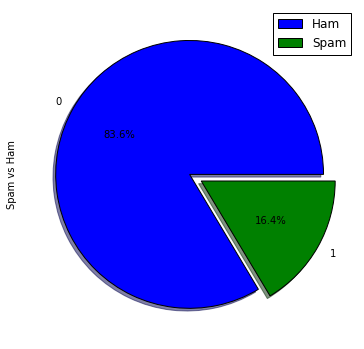

In [60]:
# Dropping rows with NA values
messages.dropna(inplace=True)

messages["category"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [61]:
messages["messageLength"] = messages["text"].apply(len)
messages["messageLength"].describe()

count      3052.000000
mean        879.644168
std        3036.337334
min           4.000000
25%         232.750000
50%         482.000000
75%         857.250000
max      123529.000000
Name: messageLength, dtype: float64

In [62]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3052 entries, 0 to 3051
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           3052 non-null   object
 1   category       3052 non-null   int64 
 2   messageLength  3052 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 95.4+ KB


In [63]:
from keras.preprocessing.text import Tokenizer
wl=50000
tokenizer=Tokenizer(num_words=wl)
tokenizer.fit_on_texts(messages["text"])
text=tokenizer.texts_to_sequences(messages["text"])
print(text[1])

[2503, 215, 15040, 15041, 8921, 8922, 1296, 371, 2079, 6720, 2433, 15042, 929, 1381, 1908, 15043, 394, 2433, 15044, 15045, 800, 2627, 6721, 5988, 91, 10753, 10754, 480, 3490, 3781, 220, 3631, 3781, 1224, 3491, 2369, 15046, 1039, 1536, 7508, 3782, 371, 2121, 6720, 10754, 6720, 2166, 629, 712, 123, 58, 167, 43, 1122, 41, 260, 543, 2, 51, 74, 123, 1, 1554, 1555, 4192, 1006, 717, 299, 58, 93, 24, 860, 299, 972, 1, 6, 123, 58, 132, 2, 610, 123, 1, 328, 275]


In [64]:
from keras.preprocessing.sequence import pad_sequences
msl=250
text=pad_sequences(text,msl)

In [77]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
label=to_categorical(messages["category"])
x_train, x_test, y_train, y_test = train_test_split(text, label, stratify = label, test_size = 0.2, random_state=40)
print(x_train.shape)
print(y_train.shape)

(2441, 250)
(2441, 2)


In [78]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Embedding

input_ = Input(shape=(250,)) 
embedding = Embedding(50000,64,input_length=250)(input_)
layer1 = (LSTM(64,input_shape=(250,10),activation='tanh'))(embedding)
layer2 = (Dense(10,activation='relu'))(layer1)
layer3 = (Dense(2,activation='softmax'))(layer2)
model = Model([input_], layer3) 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 250)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 250, 64)           3200000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 22        
Total params: 3,233,696
Trainable params: 3,233,696
Non-trainable params: 0
_________________________________________________________________


In [79]:
history=model.fit(x_train,y_train,epochs=10, validation_split=0.2 ,batch_size=10)

Epoch 1/10
196/196 [==============================] - 14s 72ms/step - loss: 0.2894 - accuracy: 0.9057 - val_loss: 0.1010 - val_accuracy: 0.9714
Epoch 2/10
196/196 [==============================] - 14s 71ms/step - loss: 0.0640 - accuracy: 0.9800 - val_loss: 0.0733 - val_accuracy: 0.9755
Epoch 3/10
196/196 [==============================] - 17s 87ms/step - loss: 0.0282 - accuracy: 0.9933 - val_loss: 0.5286 - val_accuracy: 0.8875
Epoch 4/10
196/196 [==============================] - 16s 79ms/step - loss: 0.0675 - accuracy: 0.9759 - val_loss: 0.0612 - val_accuracy: 0.9836
Epoch 5/10
196/196 [==============================] - 28s 141ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0739 - val_accuracy: 0.9836
Epoch 6/10
196/196 [==============================] - 28s 144ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0469 - val_accuracy: 0.9857
Epoch 7/10
196/196 [==============================] - 28s 144ms/step - loss: 5.2889e-04 - accuracy: 1.0000 - val_loss: 0.0568 - val_ac

In [80]:
acc=model.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

20/20 [==============================] - 0s 24ms/step - loss: 0.0496 - accuracy: 0.9918
Test set
  Loss: 0.050
  Accuracy: 0.992


In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
y_pred1 = model.predict(x_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print("Precision: {:.2f}%".format(100 * precision_score(y_test.argmax(axis=1), y_pred , average="macro")))
print("Recall: {:.2f}%".format(100 * recall_score(y_test.argmax(axis=1), y_pred , average="macro")))
print("F1 Score: {:.2f}%".format(100 * f1_score(y_test.argmax(axis=1), y_pred , average="macro")))
print("Confusion Matrix:\n") 
confusion_m = confusion_matrix(y_test.argmax(axis=1), y_pred)
print(confusion_m)

Precision: 99.52%
Recall: 97.50%
F1 Score: 98.47%
Confusion Matrix:

[[511   0]
 [  5  95]]


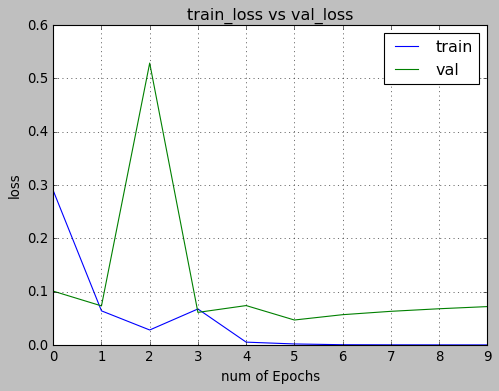

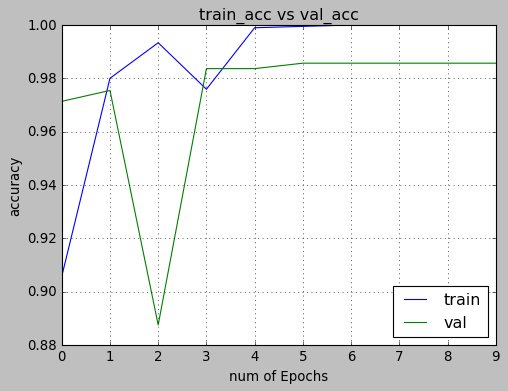

In [82]:
import matplotlib.pyplot as plt
hist=history
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(10)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

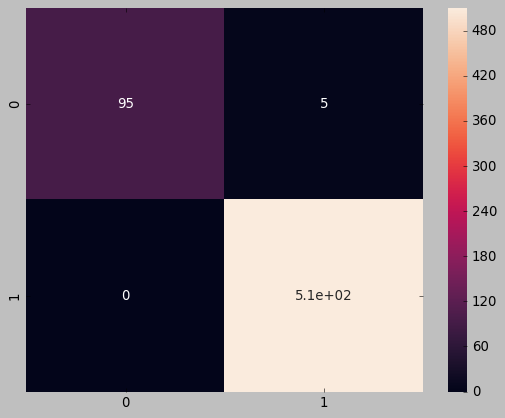

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y_pred=model.predict(x_test)
y_test
labels=[1,0]
y_test_label=[]
y_pred_label=[]

for i in y_test:
   y_test_label.append(labels[np.argmax(i)])
for i in y_pred:
    y_pred_label.append(labels[np.argmax(i)])
data = metrics.confusion_matrix(y_test_label, y_pred_label)
import seaborn as sb
sb.heatmap(data, annot=True)